# Employee Turnover Analytics

## Import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Import Data

In [2]:
df = pd.read_csv('FAU_BANK_Turnover.csv')

### Data Cleaning


In [3]:
df.isnull().values.any()

False

As the data has no missing / null values, let us proceed with further analysis right away.

In [4]:
employees_left = df[df["left"] == 1]
employees_stayed = df[df["left"] == 0]

In [5]:
# Calculate the average job satisfaction level for employees who left
employees_left = employees_left.copy()

avg_satisfaction = employees_left["job_satisfaction_level"].mean()
print("Average job satisfaction level for employees who left: ", avg_satisfaction)

salary_levels = {'low': 0, 'medium': 1, 'high': 2}
employees_left['salary'] = employees_left['salary'].map(salary_levels)
print("Salary levels: ", salary_levels)

avg_salary = employees_left["salary"].mean()
print("Average salary level for employees who left: ", avg_salary)

avg_years = employees_left["years_spent_with_company"].mean()
print("Average years spent with company for employees who left: ", avg_years)

Average job satisfaction level for employees who left:  0.4400980117614114
Salary levels:  {'low': 0, 'medium': 1, 'high': 2}
Average salary level for employees who left:  0.41472976757210867
Average years spent with company for employees who left:  3.876505180621675


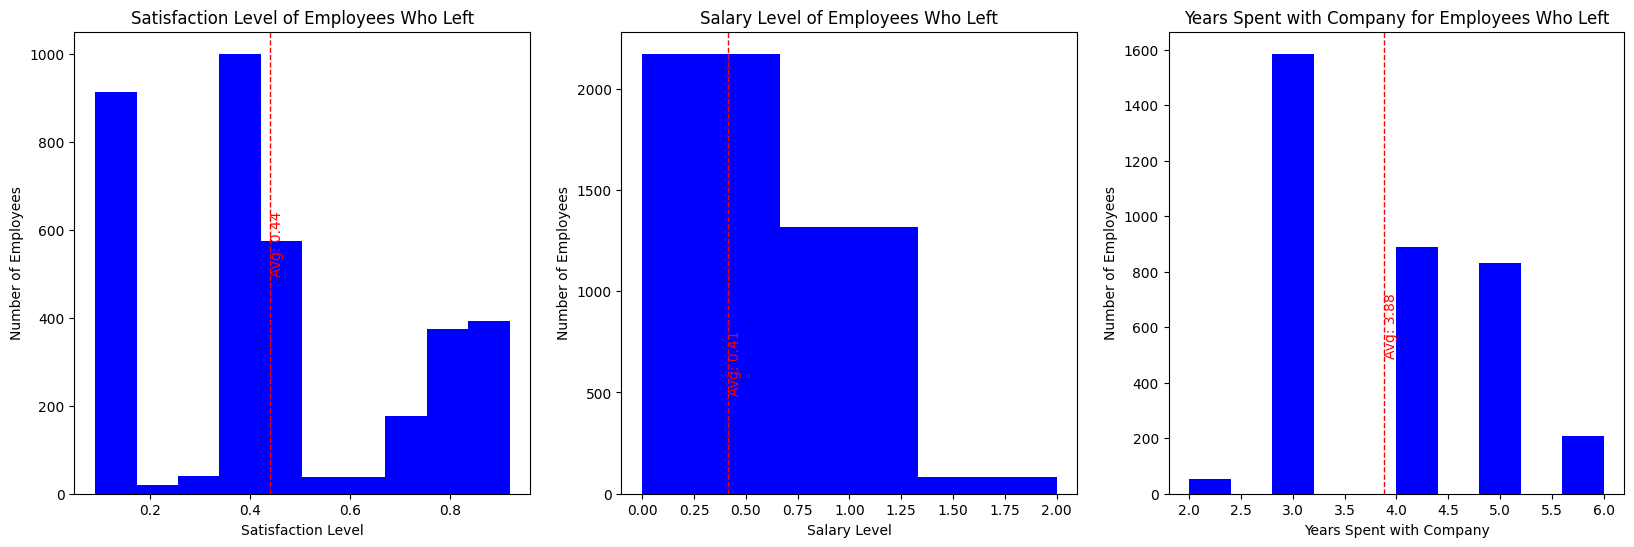

In [6]:
# draw two histograms for the satisfaction level and salary level of employees who left
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(employees_left["job_satisfaction_level"], bins=10, color='blue')
# highlight the average satisfaction level with a red dashed line and label it with the value
plt.axvline(avg_satisfaction, color='red', linestyle='dashed', linewidth=1)
plt.text(avg_satisfaction, 500, f'Avg: {avg_satisfaction:.2f}', rotation=90, color='red')
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Employees")
plt.title("Satisfaction Level of Employees Who Left")

plt.subplot(1, 3, 2)
plt.hist(employees_left["salary"], bins=3, color='blue')
plt.axvline(avg_salary, color='red', linestyle='dashed', linewidth=1)
plt.text(avg_salary, 500, f'Avg: {avg_salary:.2f}', rotation=90, color='red')
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.title("Salary Level of Employees Who Left")

plt.subplot(1, 3, 3)
plt.hist(employees_left["years_spent_with_company"], bins=10, color='blue')
plt.axvline(avg_years, color='red', linestyle='dashed', linewidth=1)
plt.text(avg_years, 500, f'Avg: {avg_years:.2f}', rotation=90, color='red')
plt.xlabel("Years Spent with Company")
plt.ylabel("Number of Employees")
plt.title("Years Spent with Company for Employees Who Left")
plt.show()



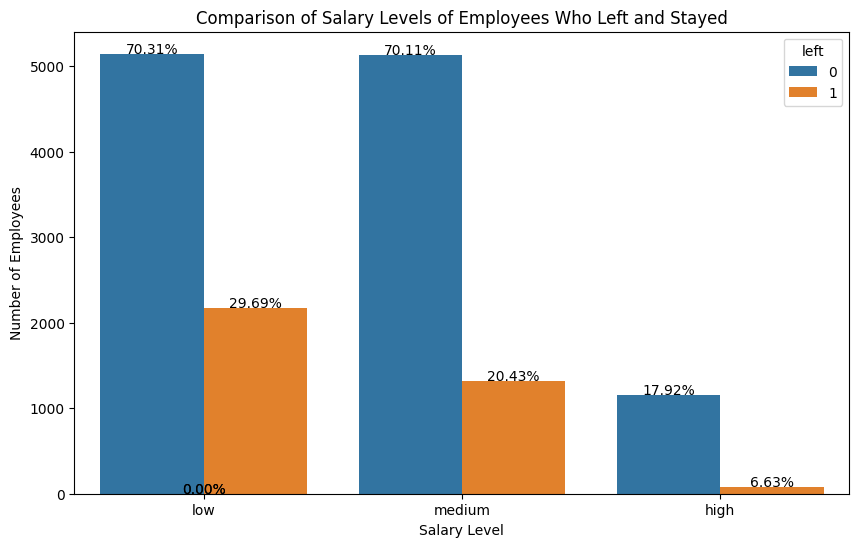

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df, employees_left, and employees_stayed are defined as before

# Plotting the graph
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='salary', data=df, hue='left')
plt.title("Comparison of Salary Levels of Employees Who Left and Stayed")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")

# Calculating total counts for each salary level
df['salary'] = df['salary'].map(salary_levels)
total_counts = df.groupby('salary')['left'].count()

# Annotating the graph with percentages
# Correcting the annotation part
for p in ax.patches:
    height = p.get_height()
    # Find the index of the bar
    index = int(p.get_x() + p.get_width() / 2.)
    salary_level = df['salary'].unique()[index]  # Assuming the order of bars matches the unique sorted salary levels
    total = total_counts[salary_level]
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(percentage), ha="center")
plt.show()

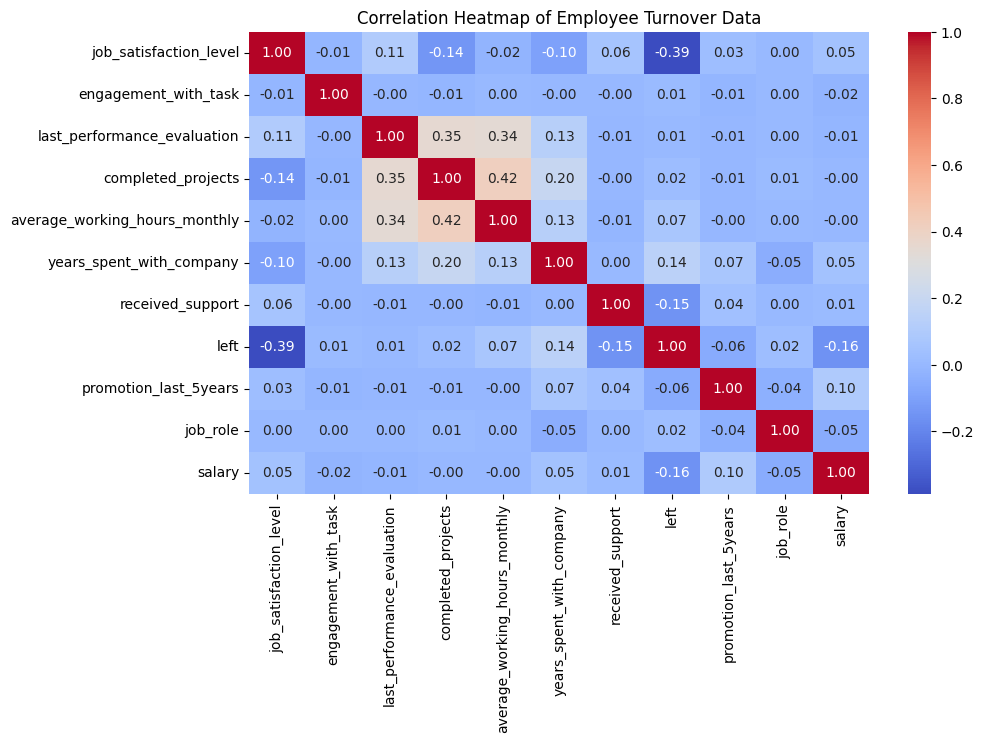

In [8]:
# draw a heatmap to show the correlation between different features

# Encoding the categorical variables
label_encoder = LabelEncoder()
df['job_role'] = label_encoder.fit_transform(df['job_role'])

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap of Employee Turnover Data")
plt.show()


In [9]:
# displaying the encoding of the job roles
print("Job Roles Encoding: ", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print("salary levels: ", salary_levels)


Job Roles Encoding:  {'IT': 0, 'bank_teller': 1, 'business_analyst': 2, 'credit_analyst': 3, 'customer_service': 4, 'finance_analystD': 5, 'hr': 6, 'investment_banker': 7, 'loan_analyst': 8, 'mortgag_consultant': 9}
salary levels:  {'low': 0, 'medium': 1, 'high': 2}


In [10]:
# data binning the job satisfaction and performance evaluation columns
df['job_satisfaction_level'] = pd.cut(df['job_satisfaction_level'], bins=5, labels=[0, 1, 2, 3, 4])
df['last_performance_evaluation'] = pd.cut(df['last_performance_evaluation'], bins=5, labels=[0, 1, 2, 3, 4])

In [11]:
# merging the columns - completed_projects and average_working_hours_monthly
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['normalized_score'] = scaler.fit_transform(df[['completed_projects']]) + scaler.fit_transform(df[['average_working_hours_monthly']])

In [12]:
# drop the columns
df.drop(['completed_projects', 'average_working_hours_monthly'], axis=1, inplace=True)


In [13]:
df.head()

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary,normalized_score
0,1,0.19,1,3,0,1,0,7,0,0.285047
1,3,0.72,3,6,0,1,0,7,1,1.375701
2,0,0.82,4,4,0,1,0,7,1,1.822430
3,3,0.66,3,5,0,1,0,7,0,1.193458
4,1,0.52,1,3,0,1,0,7,0,0.294393


### Model Building


In [14]:
# creating a model to predict employee turnover

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into features and target
X = df.drop(['left'], axis=1)
y = df['left']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluating the model

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9702222222222222


## Model Evaluation

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3428
           1       0.97      0.90      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500

Feature Importances:  {'normalized_score': 0.39113087805009183, 'job_satisfaction_level': 0.22149154207616373, 'years_spent_with_company': 0.20532474255945507, 'last_performance_evaluation': 0.0902213137019834, 'engagement_with_task': 0.040262576150444915, 'job_role': 0.023146590525900693, 'salary': 0.015690527215351843, 'received_support': 0.010829301178140146, 'promotion_last_5years': 0.001902528542468506}


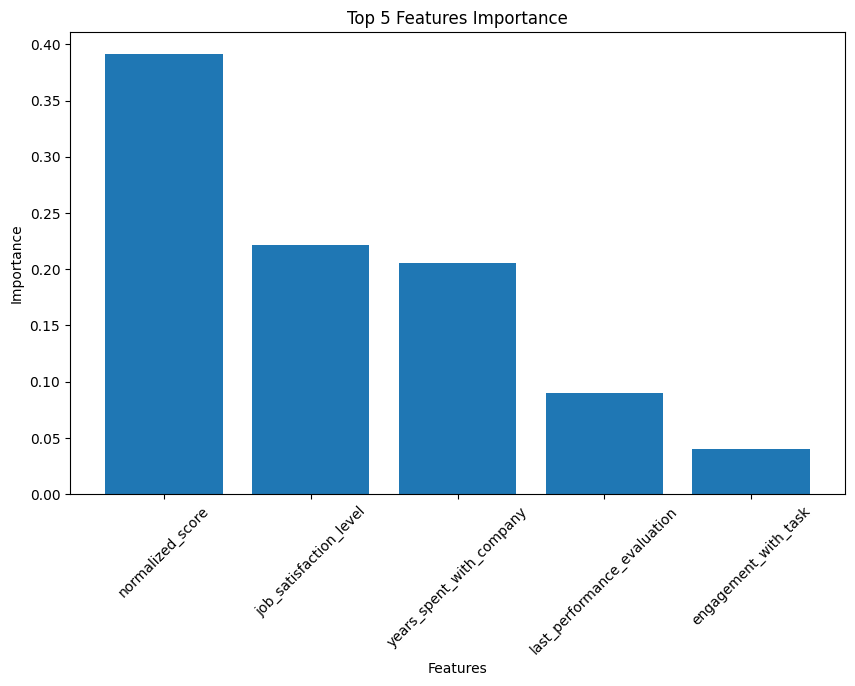

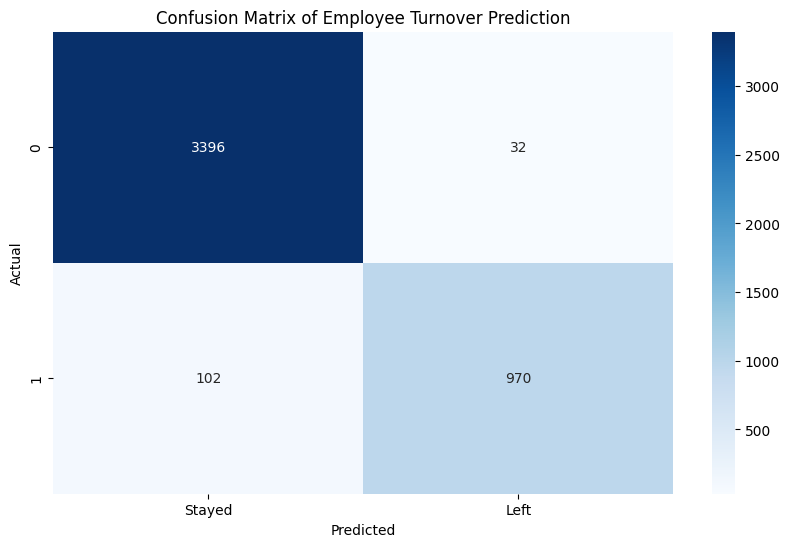

In [15]:
# Displaying the classification report
print(classification_report(y_test, y_pred))

# Displaying the feature importances
feature_importances = model.feature_importances_
features = X.columns
importances = dict(zip(features, feature_importances))
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
print("Feature Importances: ", importances)

# Displaying the top 5 features
top_5_features = dict(list(importances.items())[:5])

plt.figure(figsize=(10, 6))
plt.bar(top_5_features.keys(), top_5_features.values())
plt.title("Top 5 Features Importance")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.ylabel("Importance")
plt.show()

# Displaying the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix of Employee Turnover Prediction")
plt.xlabel("Predicted")
plt.xticks(ticks=[0.5, 1.5], labels=['Stayed', 'Left'])
plt.ylabel("Actual")
plt.show()

